# Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Prepare train test split datasets

In [2]:
df = pd.read_csv('../../data/final_features_df.csv')
df.head()

,Unnamed: 0,Age,Income,faves_pca0,faves_pca1,unfaves_pca0,unfaves_pca1,accessories,alcohol,animamted,...,Drama.2,Entertainment (Variety Shows),Factual,Learning,Music,News,Religion &amp; Ethics,Sport.1,Weather,Rating_bin
0,0,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df_0 = df.fillna(0)

In [4]:
# Y = df_0.pop('Rating_bin')
# X = df_0

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

df = df_0.sample(frac = 1)
train_frac = 0.8
test_frac = 0.1

X_train = df[[c for c in df.columns if c != 'Rating_bin']].iloc[:int(len(df) * train_frac)].values
y_train = df.Rating_bin.iloc[:int(len(df) * train_frac)].values

X_test = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
y_test = df.Rating_bin.iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values

X_valid = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * (train_frac+test_frac)):].values
y_valid = df.Rating_bin.iloc[int(len(df) * (train_frac+test_frac)):].values

## Baseline Models

### Plug-in Models
#### Simple: LDA

In [6]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3098
           1       0.46      0.15      0.23       514

    accuracy                           0.85      3612
   macro avg       0.67      0.56      0.58      3612
weighted avg       0.82      0.85      0.82      3612



In [8]:
confusion_matrix(y_test, y_pred)

array([[3006,   92],
       [ 435,   79]])

#### Complex: Naive Bayes

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.70      0.80      3098
           1       0.25      0.60      0.35       514

    accuracy                           0.69      3612
   macro avg       0.58      0.65      0.57      3612
weighted avg       0.82      0.69      0.73      3612



array([[2181,  917],
       [ 206,  308]])

In [10]:
prior_probabilities = df.groupby('Rating_bin').size().div(len(df))
prior_probabilities

prior_0 = prior_probabilities.iloc[0]
prior_1 = prior_probabilities.iloc[1]


clf = GaussianNB(priors = [prior_0, prior_1])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.70      0.80      3098
           1       0.25      0.60      0.35       514

    accuracy                           0.69      3612
   macro avg       0.58      0.65      0.57      3612
weighted avg       0.82      0.69      0.73      3612



array([[2181,  917],
       [ 206,  308]])

## Risk Minimization
### Simple: Decision Tree

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3098
           1       0.43      0.40      0.42       514

    accuracy                           0.84      3612
   macro avg       0.67      0.66      0.66      3612
weighted avg       0.84      0.84      0.84      3612



array([[2828,  270],
       [ 308,  206]])

#### Complex: Neural Networks

In [12]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3098
           1       0.00      0.00      0.00       514

    accuracy                           0.86      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.74      0.86      0.79      3612



/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

array([[3098,    0],
       [ 514,    0]])

### Hyperparameters search

In [13]:
def hyperparameter_tunning(clf, parameters):
    clf = clf

    grid_search = GridSearchCV(clf, parameters)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    print(grid_search.best_params_)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    return pd.DataFrame(grid_search.cv_results_)

#### LDA

In [14]:
parameters = {
    'solver': ('svd', 'lsqr', 'eigen'),
    'priors': [None, [0.5, 0.5]]
}


In [15]:
results = hyperparameter_tunning(LinearDiscriminantAnalysis(), parameters)
results

/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 605, in fit
    self._solve_eigen(
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.

{'priors': None, 'solver': 'svd'}
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3098
           1       0.46      0.15      0.23       514

    accuracy                           0.85      3612
   macro avg       0.67      0.56      0.58      3612
weighted avg       0.82      0.85      0.82      3612

[[3006   92]
 [ 435   79]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.985421,0.098544,0.009133,0.005429,None,svd,"{'priors': None, 'solver': 'svd'}",0.861246,0.857588,0.858626,0.864682,0.861914,0.860811,0.002512,1
1,1.084356,0.079546,0.003703,0.000735,None,lsqr,"{'priors': None, 'solver': 'lsqr'}",0.861246,0.857588,0.858626,0.864509,0.861914,0.860777,0.002459,2
2,1.130589,0.093273,0.000000,0.000000,None,eigen,"{'priors': None, 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,1.993447,0.144888,0.005452,0.002923,"[0.5, 0.5]",svd,"{'priors': [0.5, 0.5], 'solver': 'svd'}",0.736332,0.729365,0.733172,0.733345,0.726250,0.731693,0.003507,3
4,1.044810,0.042848,0.003692,0.000158,"[0.5, 0.5]",lsqr,"{'priors': [0.5, 0.5], 'solver': 'lsqr'}",0.671972,0.669493,0.664129,0.661706,0.677453,0.668951,0.005612,4
5,1.085069,0.025788,0.000000,0.000000,"[0.5, 0.5]",eigen,"{'priors': [0.5, 0.5], 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


#### Naive Bayes

In [16]:
parameters = {
    'priors': [None, [0.5, 0.5]],
    'var_smoothing': (1e-9, 0.0001, 0.01, 0.1)
}

In [17]:
results = hyperparameter_tunning(GaussianNB(), parameters)
results

{'priors': None, 'var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3098
           1       0.00      0.00      0.00       514

    accuracy                           0.86      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.74      0.86      0.79      3612

[[3098    0]
 [ 514    0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.189652,0.002621,0.046354,0.017517,None,0.0,"{'priors': None, 'var_smoothing': 1e-09}",0.704498,0.695622,0.710157,0.695103,0.698045,0.700685,0.005797,4
1,0.187344,0.000539,0.037976,0.000580,None,0.0001,"{'priors': None, 'var_smoothing': 0.0001}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
2,0.186363,0.001188,0.038075,0.000783,None,0.01,"{'priors': None, 'var_smoothing': 0.01}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
3,0.187117,0.004543,0.037364,0.000567,None,0.1,"{'priors': None, 'var_smoothing': 0.1}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
4,0.187482,0.004959,0.038085,0.001198,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}",0.451730,0.423430,0.492646,0.495414,0.482956,0.469235,0.027663,5
5,0.184094,0.001148,0.037438,0.000384,"[0.5, 0.5]",0.0001,"{'priors': [0.5, 0.5], 'var_smoothing': 0.0001}",0.465571,0.460460,0.464440,0.442983,0.476380,0.461967,0.010858,8
6,0.187042,0.004326,0.038698,0.001590,"[0.5, 0.5]",0.01,"{'priors': [0.5, 0.5], 'var_smoothing': 0.01}",0.468166,0.462018,0.464959,0.444714,0.478630,0.463697,0.011025,6
7,0.191276,0.001237,0.039201,0.000867,"[0.5, 0.5]",0.1,"{'priors': [0.5, 0.5], 'var_smoothing': 0.1}",0.468166,0.461845,0.464440,0.444714,0.478456,0.463524,0.010973,7


#### Decision Trees

In [18]:
parameters = {
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter': ('best', 'random')
}

In [19]:
results = hyperparameter_tunning(DecisionTreeClassifier(), parameters)
results

{'criterion': 'entropy', 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3098
           1       0.43      0.40      0.42       514

    accuracy                           0.84      3612
   macro avg       0.67      0.66      0.66      3612
weighted avg       0.84      0.84      0.84      3612

[[2828  270]
 [ 308  206]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.049051,0.056792,0.008844,0.000477,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.840311,0.842706,0.841668,0.844264,0.841841,0.842158,0.001303,2
1,1.957902,0.255068,0.008723,0.000276,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.841522,0.839765,0.833881,0.839765,0.838207,0.838628,0.002595,6
2,1.170894,0.088988,0.008319,0.000680,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.840311,0.842706,0.841841,0.844264,0.841841,0.842193,0.001291,1
3,1.234061,0.090641,0.008342,0.000111,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.837543,0.845302,0.841841,0.843052,0.839938,0.841535,0.002648,4
4,1.147899,0.038294,0.008312,0.000325,log_loss,best,"{'criterion': 'log_loss', 'splitter': 'best'}",0.840311,0.842706,0.841668,0.844264,0.841841,0.842158,0.001303,2
5,1.344458,0.074264,0.008642,0.000153,log_loss,random,"{'criterion': 'log_loss', 'splitter': 'random'}",0.837370,0.842014,0.838553,0.842533,0.841149,0.840324,0.002014,5


#### Neural Network

In [20]:
parameters = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    #'solver': ('lbfgs', 'sgd', 'adam'),
    'alpha': (0.0001, 0.001, 0.1)
}

In [21]:
results = hyperparameter_tunning(MLPClassifier(), parameters)
results

{'activation': 'identity', 'alpha': 0.0001}
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3098
           1       0.37      0.31      0.34       514

    accuracy                           0.83      3612
   macro avg       0.63      0.61      0.62      3612
weighted avg       0.82      0.83      0.82      3612

[[2824  274]
 [ 353  161]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.727905,0.712486,0.009870,0.000648,identity,0.0001,"{'activation': 'identity', 'alpha': 0.0001}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
1,5.100019,0.806848,0.009917,0.000920,identity,0.001,"{'activation': 'identity', 'alpha': 0.001}",0.865744,0.865721,0.867105,0.867278,0.867278,0.866625,0.000732,8
2,6.020827,1.968543,0.011140,0.001365,identity,0.1,"{'activation': 'identity', 'alpha': 0.1}",0.172491,0.867105,0.867105,0.867105,0.867278,0.728217,0.277863,12
3,6.038649,1.914150,0.017741,0.001322,logistic,0.0001,"{'activation': 'logistic', 'alpha': 0.0001}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
4,6.458497,1.940697,0.017601,0.002630,logistic,0.001,"{'activation': 'logistic', 'alpha': 0.001}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
5,6.624129,1.865618,0.019502,0.003169,logistic,0.1,"{'activation': 'logistic', 'alpha': 0.1}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
6,4.874951,0.933504,0.017651,0.000973,tanh,0.0001,"{'activation': 'tanh', 'alpha': 0.0001}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
7,4.100712,0.510135,0.018297,0.001918,tanh,0.001,"{'activation': 'tanh', 'alpha': 0.001}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
8,3.672273,0.368400,0.017545,0.001436,tanh,0.1,"{'activation': 'tanh', 'alpha': 0.1}",0.867128,0.867105,0.867105,0.867105,0.867278,0.867144,0.000068,1
9,8.405042,2.829150,0.013054,0.001862,relu,0.0001,"{'activation': 'relu', 'alpha': 0.0001}",0.844810,0.867105,0.867105,0.867105,0.859837,0.861192,0.008661,10


# Probability Calibration

/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_88773/4244458037.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_train)
/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_88773/4244458037.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_test)


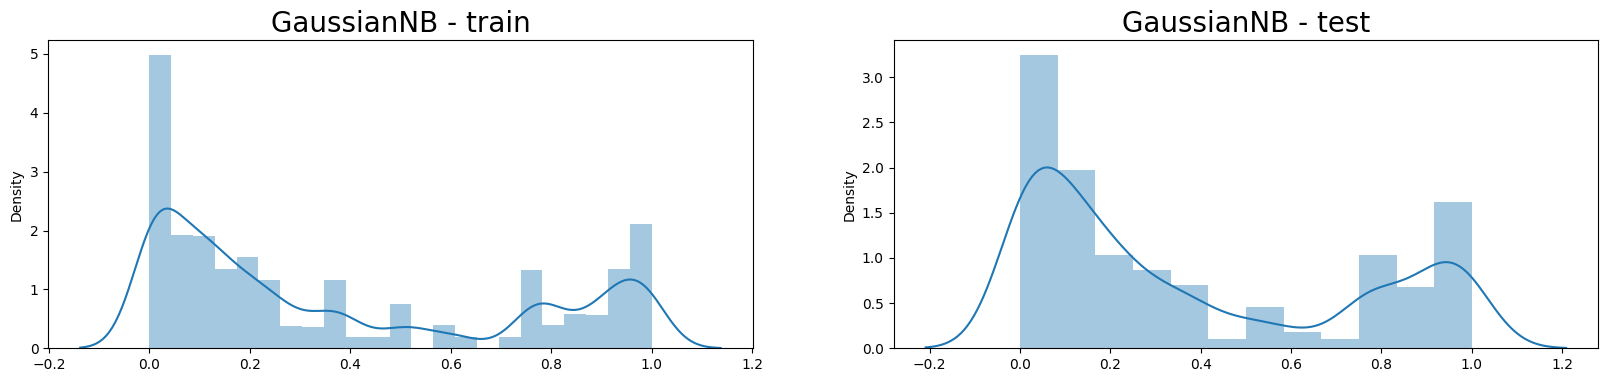

In [22]:
# as seen in class
model_to_probs = {}
model_str_to_trained_model = {}

clf = GaussianNB()
clf.fit(X_train, y_train)

pred_probs_train = clf.predict_proba(X_train)[:,1]
pred_probs_test = clf.predict_proba(X_test)[:,1]
pred_probs_valid = clf.predict_proba(X_valid)[:,1]

model_to_probs['GaussianNB'] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.distplot(pred_probs_train)
plt.title(f"GaussianNB - train", fontsize=20)

plt.subplot(1,2,2)
sns.distplot(pred_probs_test)
plt.title(f"GaussianNB - test", fontsize=20)

model_str_to_trained_model['GaussianNB'] = clf

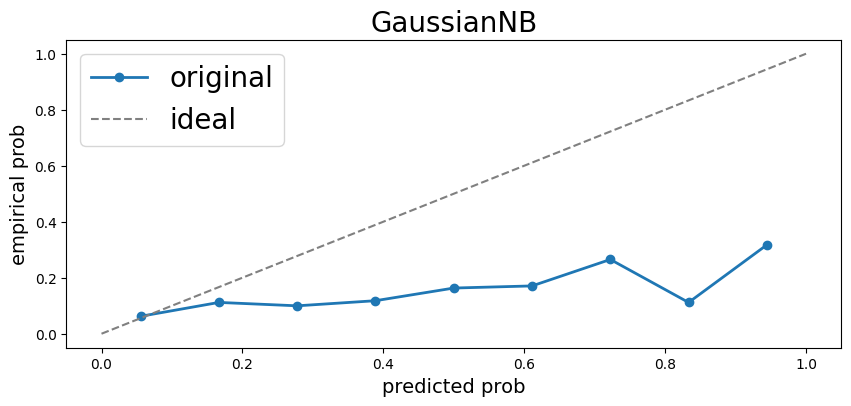

In [23]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_test[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

Brier score of GaussianNB 0.11472256287037001


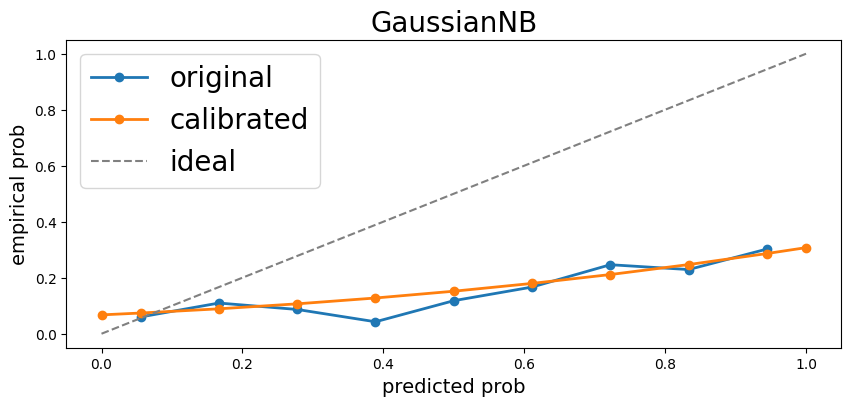

In [24]:
model_str_to_calibrator = {}

for model_str, pred_prob_dict in model_to_probs.items():
    #train calibration model
    lr_model = LogisticRegression()
    lr_model.fit(pred_prob_dict['test'].reshape(-1,1), y_test)
    
    pred_probs = pred_prob_dict['valid']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_valid[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    print('Brier score of '+model_str, brier_score_loss(y_test, lr_model.predict_proba(pred_prob_dict['test'].reshape(-1,1))[:,1]))
    
    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)
    
    model_str_to_calibrator[model_str] = lr_model